In [485]:
import numpy as np
import random

In [486]:
class relu_neuron:
    def __init__(self, input_size, learning_rate):
        self.learning_rate = learning_rate
        self.input_size = input_size
        self.weights = np.array([np.random.normal(loc = 0.1/input_size, scale = 0.05/input_size) for a in range(input_size)])
    def forward(self, input):
        self.input = input
        self.activation = np.dot(self.weights, input)
        self.output = self.activation * int(self.activation >= 0)       # apply relu to activation
    def backward(self, prev_grad):
        k = int(self.output >= 0) * prev_grad                           # dG/da
        self.grad = np.array([k * a for a in self.input])               # dG/dw
        self.grad_out = np.array([k * a for a in self.weights])           # dG/dy
        self.weights = self.weights - self.learning_rate * self.grad

In [487]:
class hardsig_neuron:
    def __init__(self, input_size, learning_rate):
        self.learning_rate = learning_rate
        self.input_size = input_size
        self.weights = np.array([np.random.normal(loc = 0.1/input_size, scale = 0.05/input_size) for a in range(input_size)])
    def forward(self, input):
        self.input = input
        self.activation = np.dot(self.weights, input)
        if self.activation < -1:                                         # apply hard sigmoid to activation 
            self.output = 0
        elif self.activation < 1:
            self.output = (self.activation + 1)/2
        else:
            self.output = 1
        # apply hard sigmoid to activation
    def backward(self, prev_grad):
        k = int(0 <= self.output < 1) * prev_grad                       # dG/da
        self.grad = np.array([k * a for a in self.input])               # dG/dw
        self.grad_out = np.array([k * a for a in self.weights])           # dG/dy
        self.weights = self.weights - self.learning_rate * self.grad

In [488]:
learning_rate = 0.0001
layer_size = 8
input_size = 9
#initialisation
n0 = hardsig_neuron(layer_size, learning_rate)
layer1 = [relu_neuron(input_size, learning_rate) for i in range(layer_size)]

In [489]:
def forward(input, label):
    layer1_out = []
    for neuron in layer1:
        neuron.forward(input)
        layer1_out.append(neuron.output)
    n0.forward(layer1_out)
    return  n0.output, (n0.output - label)**2

In [490]:
def backward(output, label):
    grad = 2*(output - label)              # dG/dx
    n0.backward(grad)                      # dG/dx * dx/da * dG/dw = dG/dw used to update weights
    grad = n0.grad_out                     # dG/dx * dx/da * dG/dy = dG/dy
    for i in range(len(layer1)):
        layer1[i].backward(grad[i])        # dG/dy * dy/da * dG/dw = dG/dw used to update weights

In [491]:
def train(images, labels):
    losses = []
    correct = []
    for i in range(len(images)):
        image = np.reshape(images[i], -1)
        output, loss = forward(image, labels[i])
        backward(output, labels[i])
        losses.append(loss)
        correct.append(int(round(output) == labels[i]))
    accuracy = sum(correct) / len(correct)
    return losses, correct, accuracy

In [492]:
# generate images & labels
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import skimage.measure
import random
n = 1000
images = []
labels = []
for i in range(n):
    width, height = 81, 81
    image = Image.new("1", (width, height), 0)
    draw = ImageDraw.Draw(image)
    x1, y1 = 0, random.randint(height//3, height//1.5)
    x2, y2 = width-1, random.randint(height//3, height//1.5)
    draw.line((x1, y1, x2, y2), fill=1 , width=1)
    image.save("random_line_image.png")
    convolved_image = Image.open(r"random_line_image.png").convert('RGB')
    rad = 10
    convolved_image = convolved_image.filter(ImageFilter.GaussianBlur(radius=rad))   
    convolved_image.save("convolved_image.png")
    convolved_array = 2.5*rad*np.array(convolved_image.convert('L'))
    small_array = skimage.measure.block_reduce(convolved_array, (27,27), np.average)
    mean = 0
    var = 256
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, small_array.shape)
    gauss = gauss.reshape(small_array.shape)
    noisy = small_array + gauss
    if random.randint(0,1) == 0:
        images.append(np.array(noisy))
        labels.append(1)
    else:
        images.append(np.transpose(np.array(noisy)))
        labels.append(0)
images = np.array(images)
labels = np.array(labels)

In [493]:
batches = 100
batch_size = np.floor(n/batches)
accuracies = []
for i in range(batches):
    a, b, c = train(images[int(i*batch_size):int((i+1)*batch_size)], labels[int(i*batch_size):int((i+1)*batch_size)])
    accuracies.append(c)

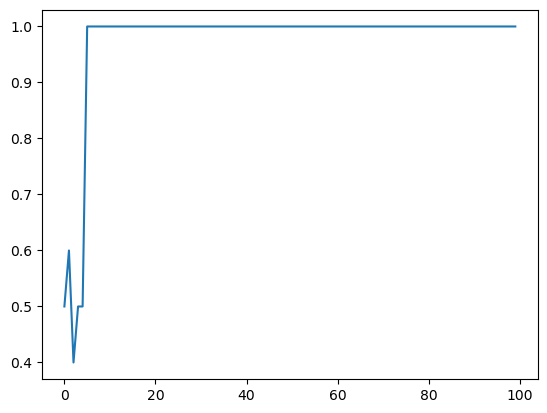

In [494]:
plt.plot(accuracies)

In [495]:
i = random.randint(0,1000)
output, loss = forward(np.reshape(images[i], -1), labels[i])
print(output, labels[i])

0 0


In [496]:
print(len(n0.weights))

8


In [497]:
print("hard_sig neuron weights",n0.weights)
for neuron in layer1:
    print(print("relu neuron weights",neuron.weights))

hard_sig neuron weights [ 0.03306608 -0.06702068 -0.01163865  0.01629967 -0.01436207  0.02377248
  0.0546618   0.02711754]
relu neuron weights [ 0.01658402 -0.01843679  0.02014468  0.02530407  0.00320654  0.0173337
  0.01665796 -0.00763648  0.0012969 ]
None
relu neuron weights [ 0.01653374  0.03722216  0.01911635 -0.02077744  0.01045496 -0.02809809
  0.01549362  0.04880826  0.0125557 ]
None
relu neuron weights [0.00772327 0.01724321 0.01045974 0.00956066 0.01421353 0.00432768
 0.00901118 0.00998215 0.00244909]
None
relu neuron weights [ 0.00624009 -0.0044792  -0.00449882  0.01126995  0.0062955   0.02370598
  0.00731724  0.00125383  0.01852905]
None
relu neuron weights [0.00513748 0.01847366 0.00555777 0.00718693 0.02104721 0.00404278
 0.00591591 0.01301414 0.00789195]
None
relu neuron weights [ 0.01705244 -0.0052332   0.01230216  0.01814398  0.00523721  0.02403081
  0.0188182  -0.00659575  0.01085116]
None
relu neuron weights [ 0.01049159 -0.03426547  0.01125129  0.03783374 -0.00154742

In [498]:
print(int(bin(-1),2))

-1


In [499]:
print()

In [501]:
n0weights = [bin(int((2**12)*a)) for a in n0.weights]
layer1weights = [[bin(int((2**12)*weight)) for weight in neuron.weights] for neuron in layer1]

In [505]:
for i in range(len(n0weights)):
    if n0weights[i][0] == "-":
        n0weights[i] = bin(((2**26-1) ^ int(n0weights[i][3:])) + 1)

for i in range(len(layer1weights)):
    for j in range(len(layer1weights[i])):
            if layer1weights[i][j][0] == "-":
                layer1weights[i][j] = bin(((2**26-1) ^ int(layer1weights[i][j][3:])) + 1)


In [506]:
print(n0weights)
print(layer1weights)

['0b10000111', '0b110000010011111011111100110', '0b11111111100111010100001001', '0b1000010', '0b11111111100100111001011110', '0b1100001', '0b11011111', '0b1101111']
[['0b1000011', '0b11111100001011100111001101', '0b1010010', '0b1100111', '0b1101', '0b1000110', '0b1000100', '0b11111111111101010010011001', '0b101'], ['0b1000011', '0b10011000', '0b1001110', '0b11111100001001011001001011', '0b101010', '0b11111011110001000000000101', '0b111111', '0b11000111', '0b110011'], ['0b11111', '0b1000110', '0b101010', '0b100111', '0b111010', '0b10001', '0b100100', '0b101000', '0b1010'], ['0b11001', '0b11111111111101100011100110', '0b11111111111101100011100110', '0b101110', '0b11001', '0b1100001', '0b11101', '0b101', '0b1001011'], ['0b10101', '0b1001011', '0b10110', '0b11101', '0b1010110', '0b10000', '0b11000', '0b110101', '0b100000'], ['0b1000101', '0b11111111111101100010001011', '0b110010', '0b1001010', '0b10101', '0b1100010', '0b1001101', '0b11111111111101010011111101', '0b101100'], ['0b101010', '0

In [504]:
for i in n0weights:
    print(i)

0b10000111
0b110000010011111011111100110
0b11111111100111010100001001
0b1000010
0b11111111100100111001011110
0b1100001
0b11011111
0b1101111
